Lab 2 - Image Processing


In [2]:
!pip install opencv-python matplotlib ipywidgets seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider


In [ ]:
# Đọc ảnh mẫu (đổi thành ảnh bạn cần)
img_bgr = cv2.imread(
    'E:\MSE\HomeWork\Ky 2\IVP501\Lab & Test & Project\Lab 2\image009.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


In [ ]:
# Hiển thị histogram
def display_histogram(img, title='Histogram'):
    plt.figure(figsize=(6, 4))
    if len(img.shape) == 2:
        plt.hist(img.ravel(), 256, [0, 256], color='gray')
    else:
        for i, col in enumerate(['r', 'g', 'b']):
            plt.hist(img[:, :, i].ravel(), 256, [0, 256], color=col, alpha=0.5)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
# Function 1: Color balance
def color_balance(r_gain=1.0, g_gain=1.0, b_gain=1.0):
    b, g, r = cv2.split(img_bgr)
    r = np.clip(r * r_gain, 0, 255).astype(np.uint8)
    g = np.clip(g * g_gain, 0, 255).astype(np.uint8)
    b = np.clip(b * b_gain, 0, 255).astype(np.uint8)
    balanced = cv2.merge([b, g, r])
    balanced_rgb = cv2.cvtColor(balanced, cv2.COLOR_BGR2RGB)

    # So sánh ảnh gốc và ảnh đã chỉnh
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(balanced_rgb)
    plt.title(f"Balanced R:{r_gain} G:{g_gain} B:{b_gain}")
    plt.axis('off')
    plt.show()

    display_histogram(img_rgb, title="Histogram - Original")
    display_histogram(balanced_rgb, title="Histogram - Balanced")

    # Tạo sliders để chỉnh
interact(color_balance,
         r_gain=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0),
         g_gain=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0),
         b_gain=FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0))


interactive(children=(FloatSlider(value=1.0, description='r_gain', max=2.0, min=0.5), FloatSlider(value=1.0, d…

<function __main__.color_balance(r_gain=1.0, g_gain=1.0, b_gain=1.0)>

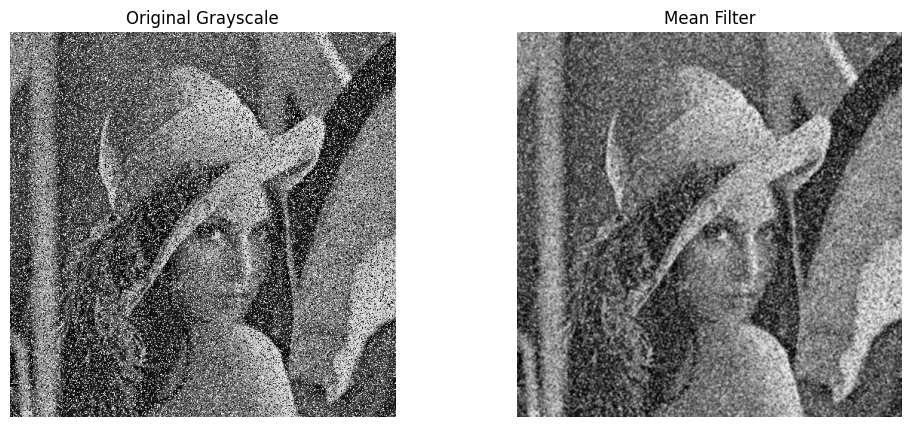

C:\Users\Admin\AppData\Local\Temp\ipykernel_16056\2392616830.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256], color='gray')


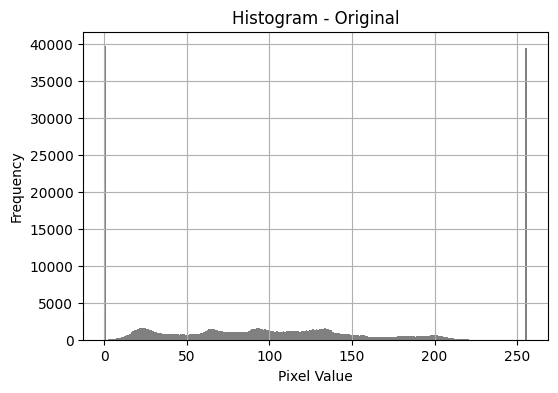

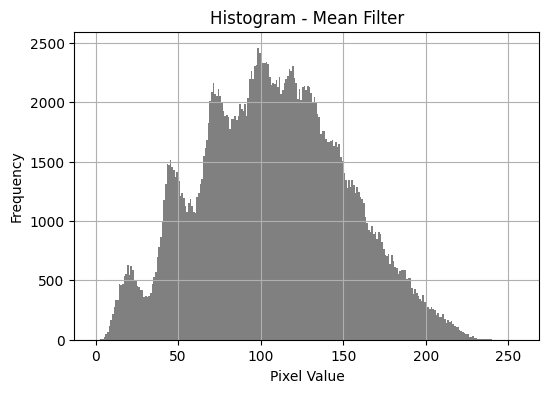

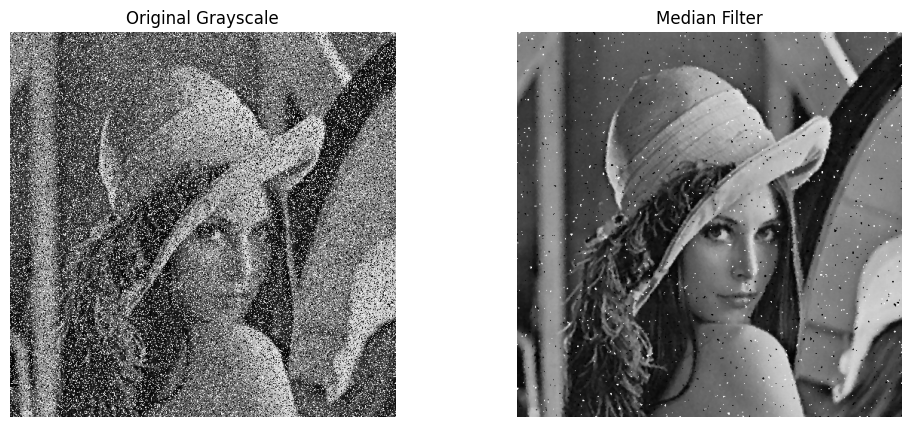

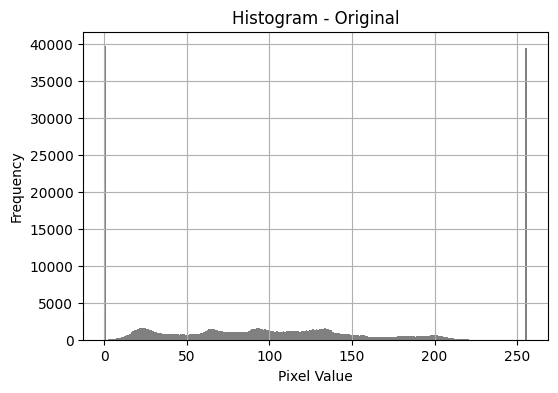

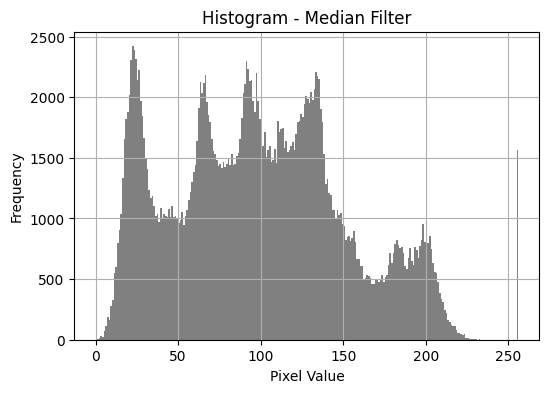

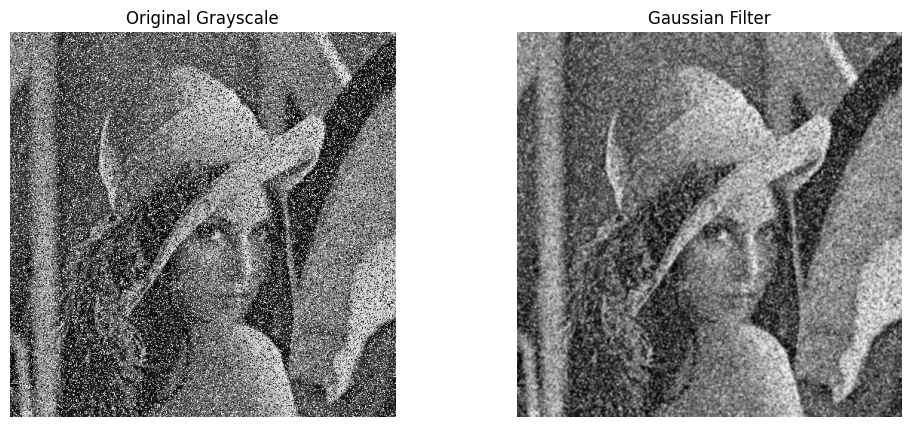

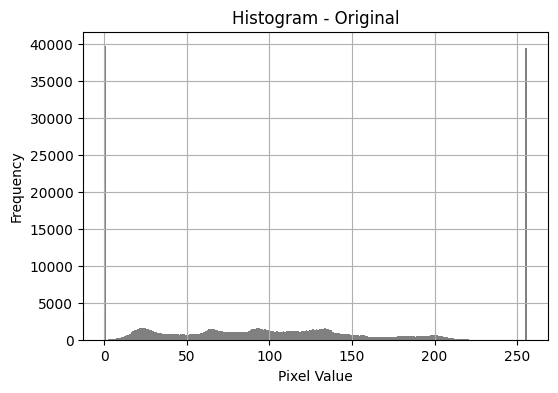

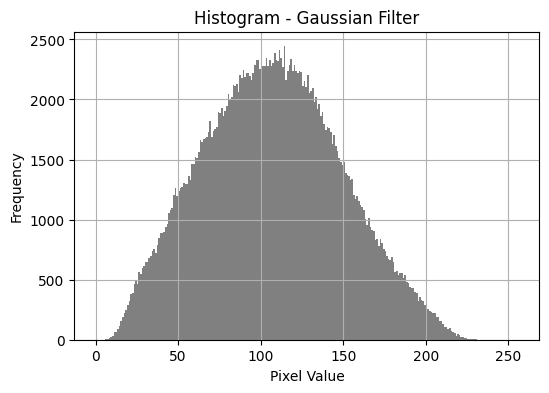

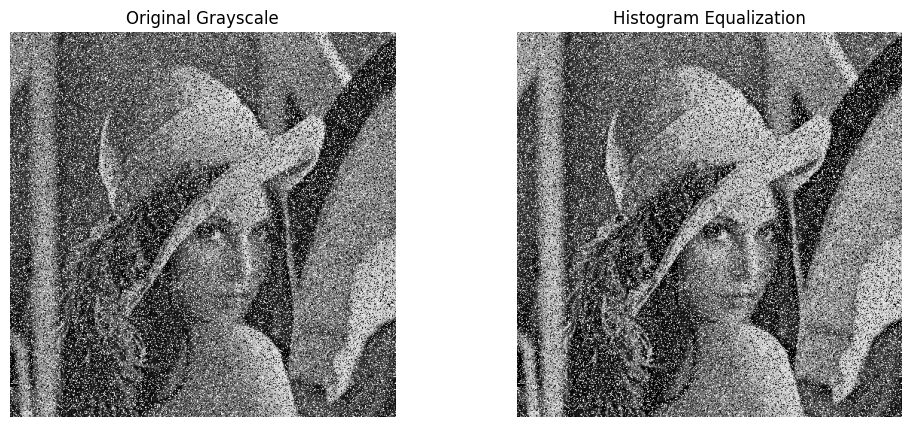

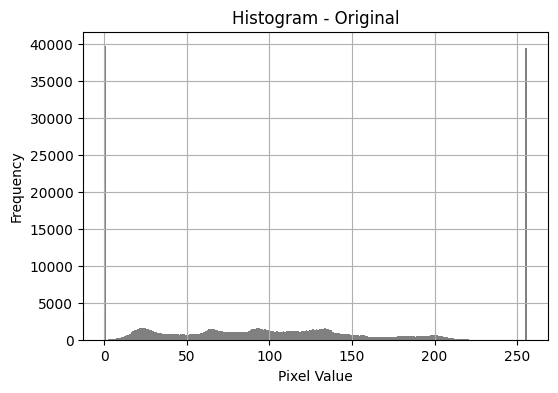

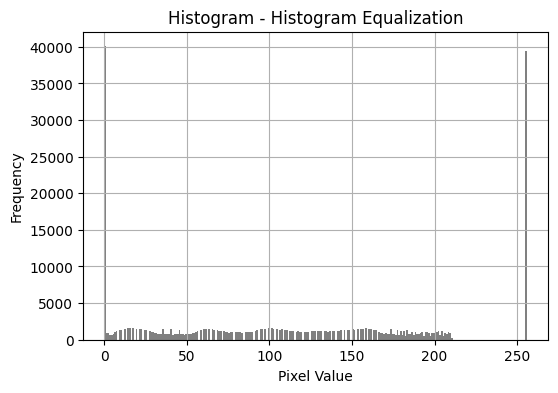

In [ ]:
def apply_filter_and_plot(img_gray, filter_func, title):
    filtered = filter_func(img_gray)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original Grayscale")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

    display_histogram(img_gray, title="Histogram - Original")
    display_histogram(filtered, title=f"Histogram - {title}")


# Mean filter
apply_filter_and_plot(img_gray, lambda x: cv2.blur(x, (3, 3)), "Mean Filter")

# Median filter
apply_filter_and_plot(
    img_gray, lambda x: cv2.medianBlur(x, 3), "Median Filter")

# Gaussian filter
apply_filter_and_plot(img_gray, lambda x: cv2.GaussianBlur(
    x, (5, 5), 1.0), "Gaussian Filter")

# Histogram Equalization


def histogram_equalization(img_gray):
    eq = cv2.equalizeHist(img_gray)
    apply_filter_and_plot(img_gray, lambda _: eq, "Histogram Equalization")


histogram_equalization(img_gray)


Đầy đủ


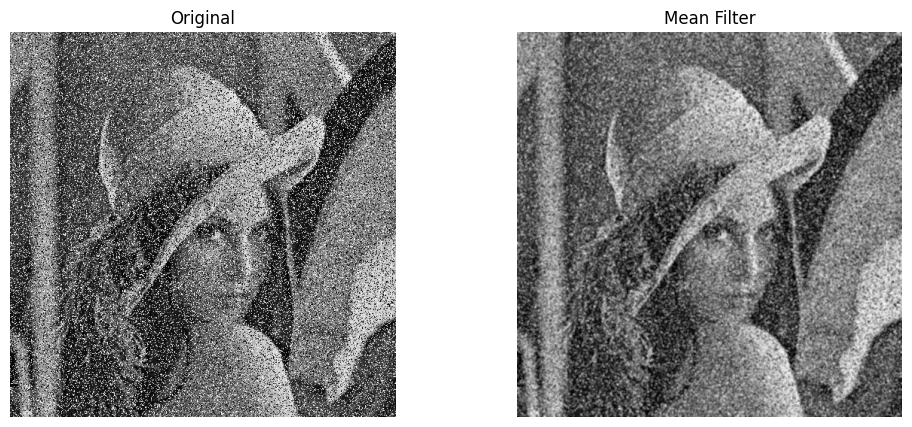

C:\Users\Admin\AppData\Local\Temp\ipykernel_14512\1578695513.py:24: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256], color='gray')


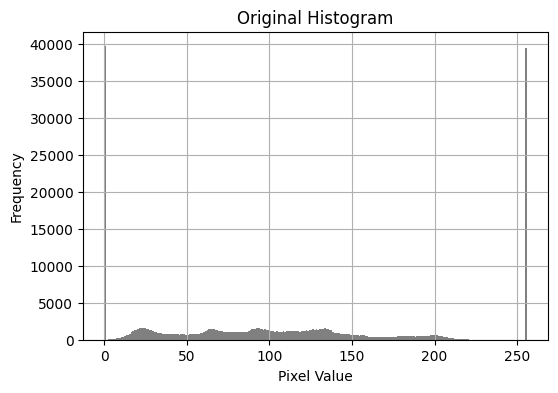

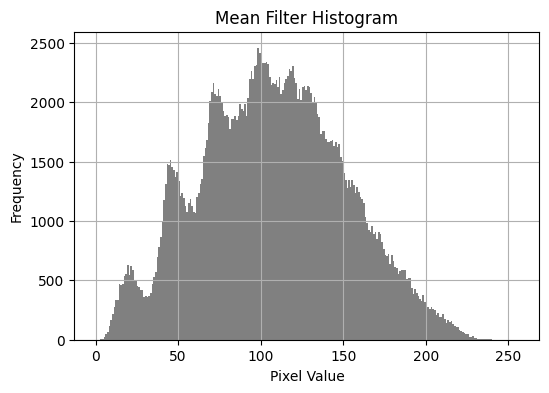

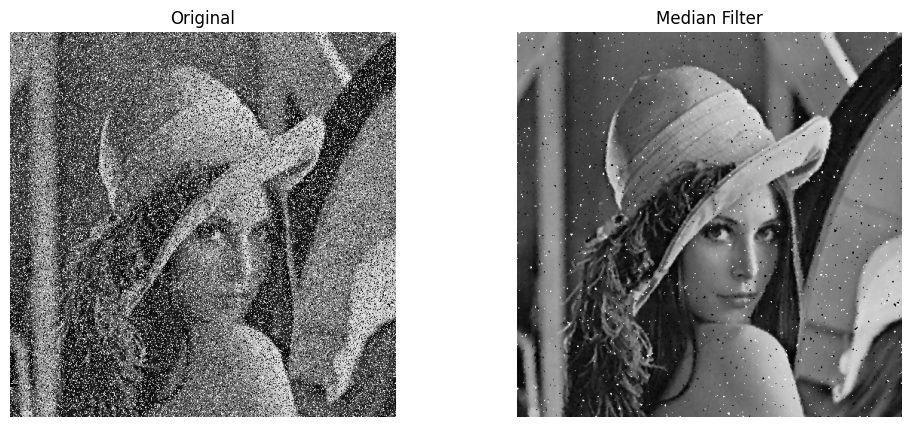

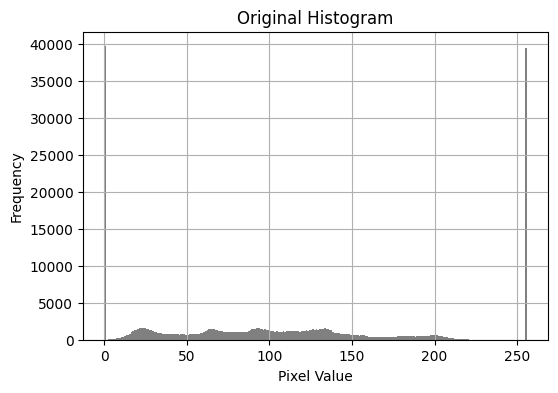

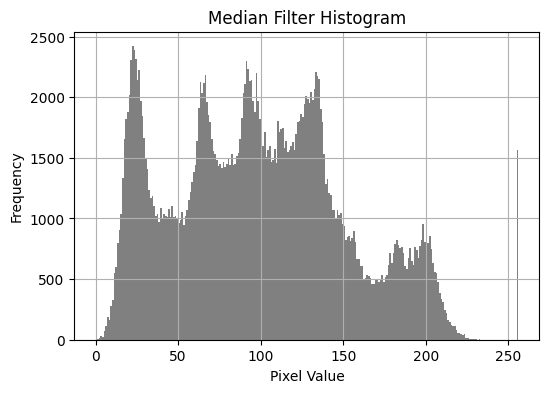

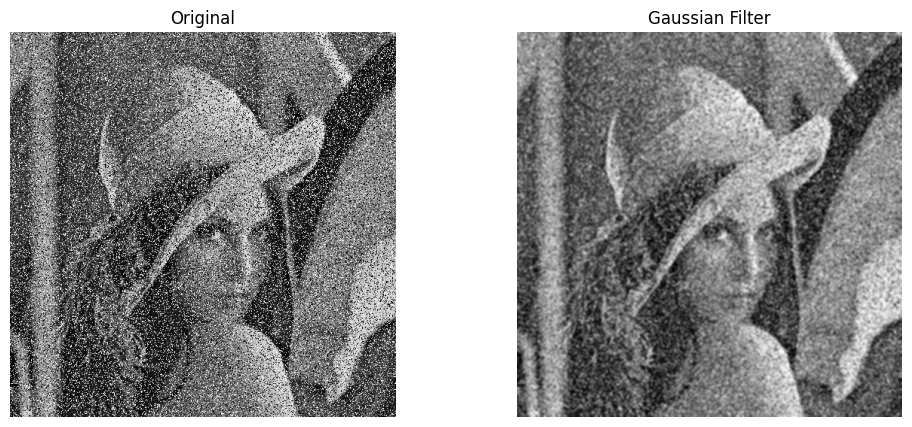

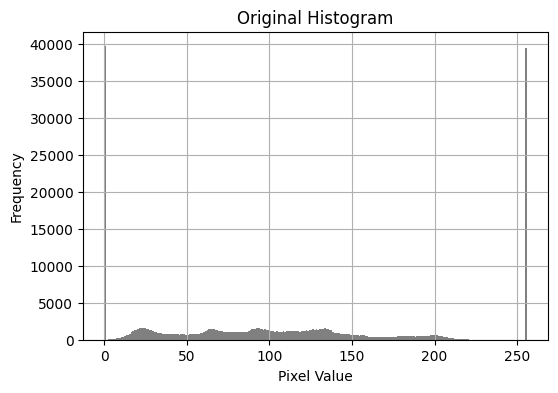

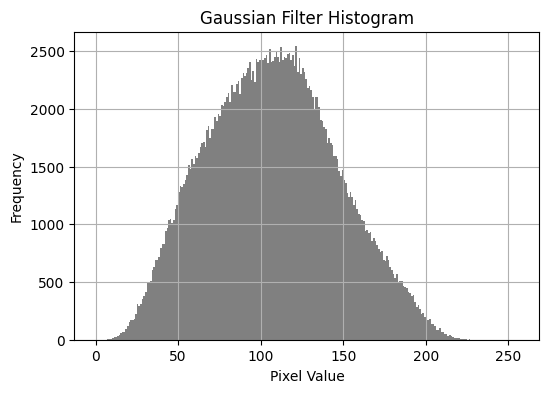

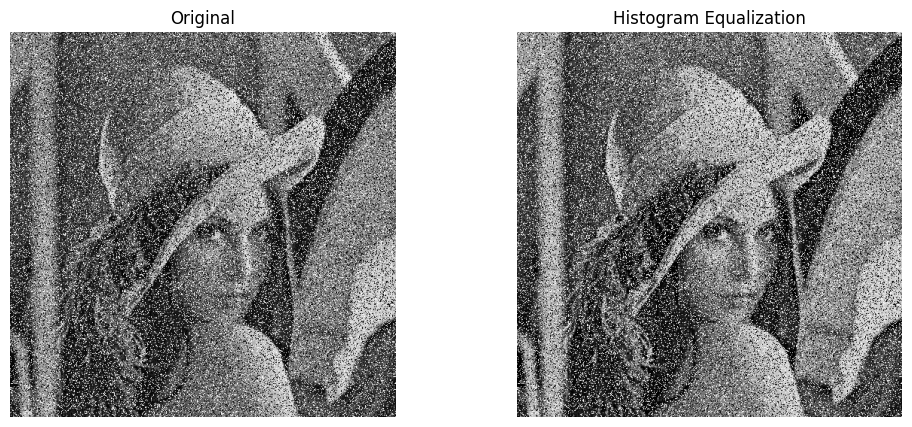

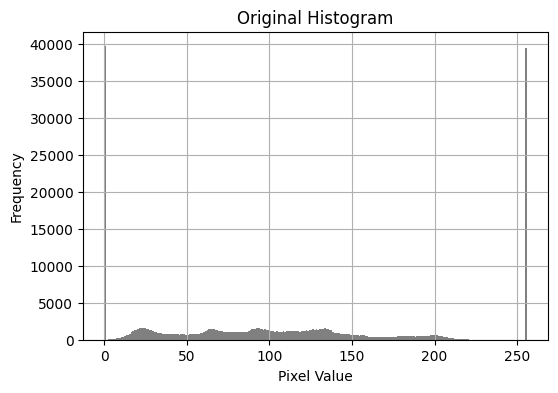

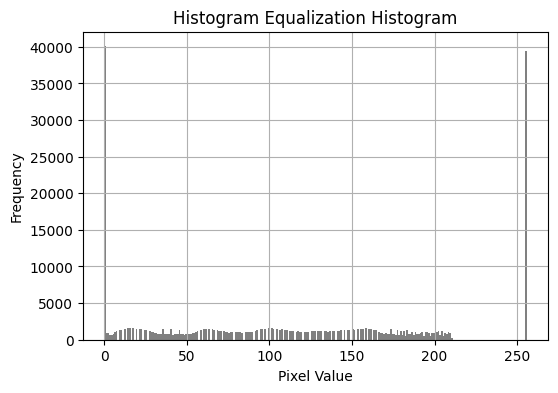

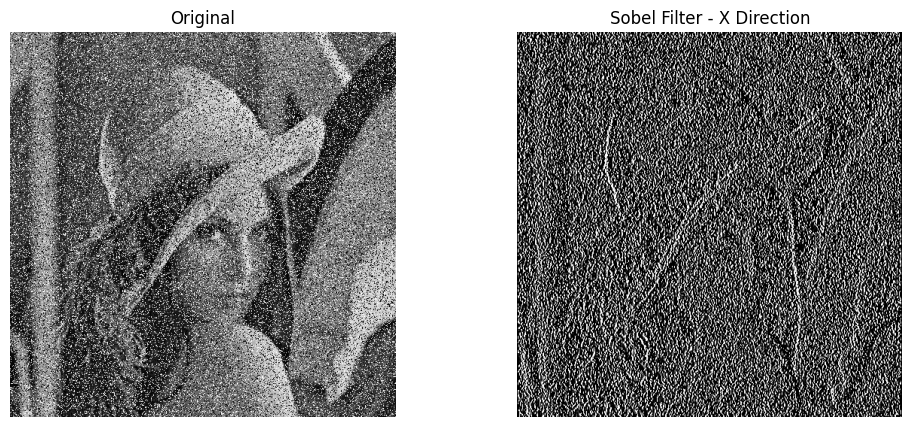

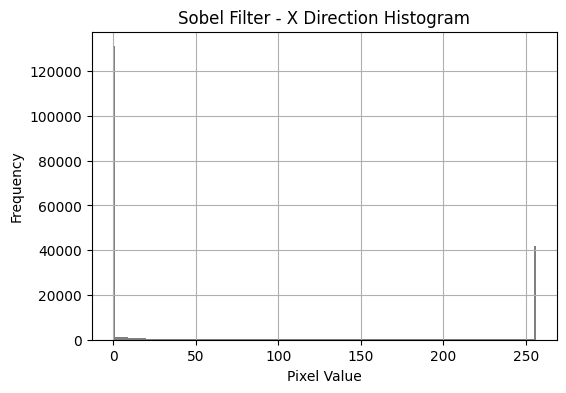

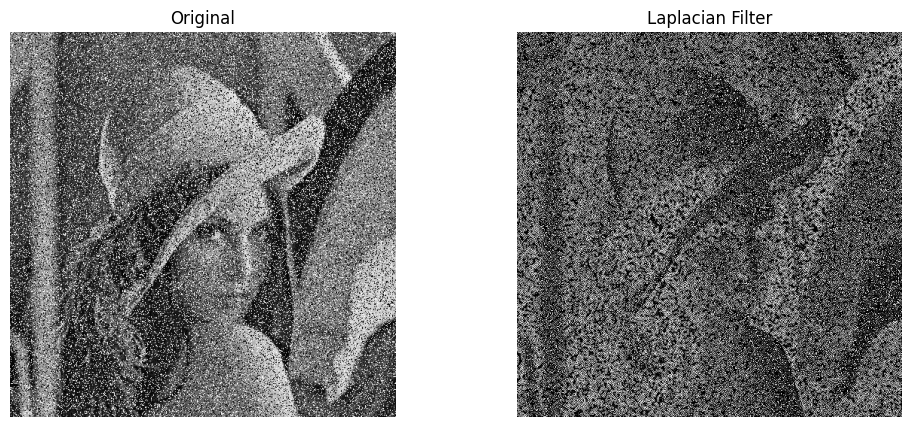

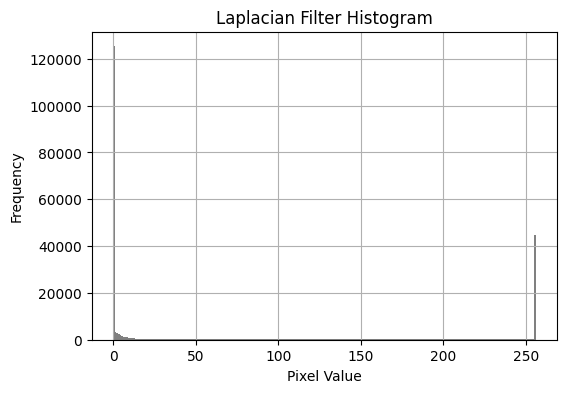

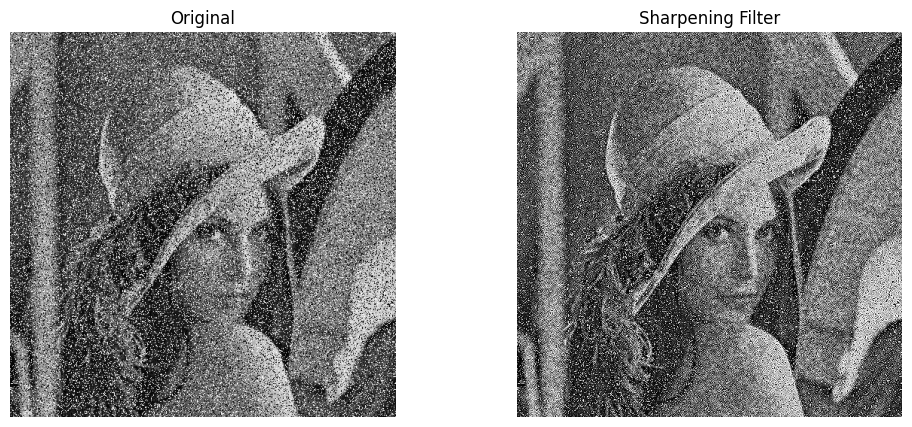

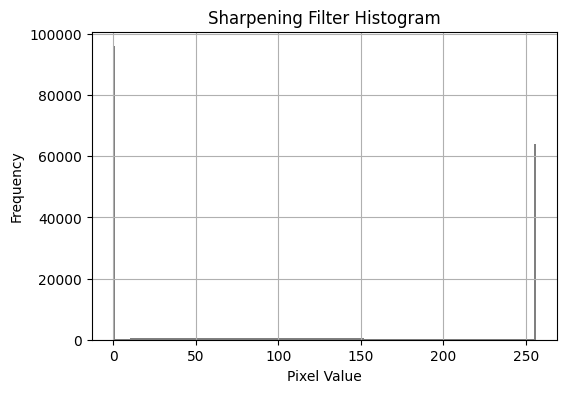

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
import os
from PIL import Image
import io
import base64
from IPython.display import display
import seaborn as sns

# Load image from path (provided earlier)
image_path = "E:\MSE\HomeWork\Ky 2\IVP501\Lab & Test & Project\Lab 2\image009.jpg"
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Display histogram function


def display_histogram(img, title='Histogram'):
    plt.figure(figsize=(6, 4))
    if len(img.shape) == 2:
        plt.hist(img.ravel(), 256, [0, 256], color='gray')
    else:
        for i, col in enumerate(['r', 'g', 'b']):
            plt.hist(img[:, :, i].ravel(), 256, [0, 256], color=col, alpha=0.5)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Common plotting for filter output


def apply_filter_and_plot_gray(img_gray: np.ndarray, filter_func: Callable[[np.ndarray], np.ndarray], title: str):
    filtered = filter_func(img_gray)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

    display_histogram(img_gray, "Original Histogram")
    display_histogram(filtered, f"{title} Histogram")

# Convolution with a custom kernel


def apply_custom_convolution(img, kernel, title):
    filtered = cv2.filter2D(img, -1, kernel)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    display_histogram(filtered, f"{title} Histogram")


# 1. Mean Filter
apply_filter_and_plot_gray(
    img_gray, lambda x: cv2.blur(x, (3, 3)), "Mean Filter")

# 2. Median Filter
apply_filter_and_plot_gray(
    img_gray, lambda x: cv2.medianBlur(x, 3), "Median Filter")

# 3. Gaussian Filter
apply_filter_and_plot_gray(img_gray, lambda x: cv2.GaussianBlur(
    x, (5, 5), 1.5), "Gaussian Filter")

# 4. Histogram Equalization
apply_filter_and_plot_gray(
    img_gray, lambda x: cv2.equalizeHist(x), "Histogram Equalization")

# 5. Sobel Filter (Edge Detection - example of convolution)
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
apply_custom_convolution(img_gray, sobel_kernel_x,
                         "Sobel Filter - X Direction")

# 6. Laplacian Filter (Edge detection - 2nd derivative)
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
apply_custom_convolution(img_gray, laplacian_kernel, "Laplacian Filter")

# 7. Sharpening Filter
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
apply_custom_convolution(img_gray, sharpen_kernel, "Sharpening Filter")
